# Simulaciones con parámetros calculados mediante los números adimensionales para que tengan sentido físico.

Luego de hacer las cuentas necesarias encontramos que para el sistema de la caja de dimensión 1e-3 que cae en otra ubicada abajo de las mismas dimensiones, tenemos que los valores teóricos necesarios para su estabilización y otros números adimensionales asociados son los siguientes:

- v_ch = 0.14 m/s     (Torricelli-U_potencial)
- c = 1.4             # Parámetro Tait           
- Fr = 1 - 1.4
- Re = 280            (Flujo laminar, teorizado por torricelli)
- B = 280             # Parámetro Tait
- dt = 4e-6           # Parámetro integración


#### 1. Hacemos ahora uso de la columna 20x40, de media caja de simulación para las pruebas de los parámetros.

La estructura se encuentra dentro de la carpeta /Config/vaciado_05fluid, sin embargo, el agujero es muy grande para aplicar la ley de Torricelli por lo que solo se hará para estabilización inicial.

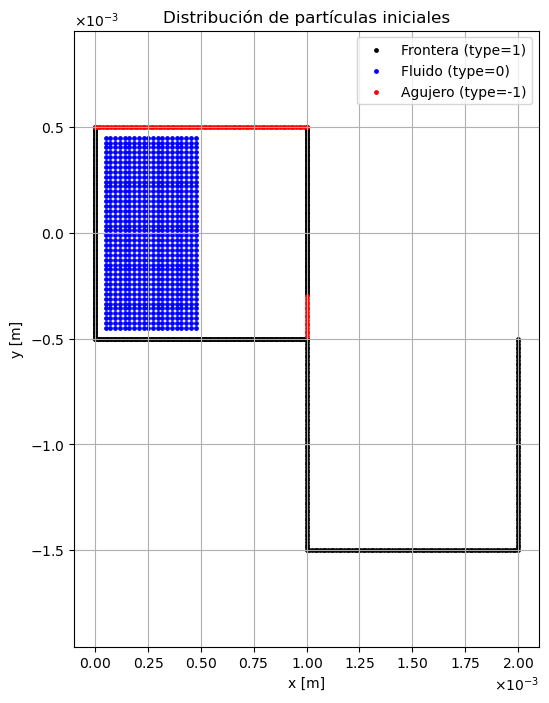

In [1]:
from utils.plot_ics import plot_ics
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")
est_Mac_2_cut = f"{PROJECT_ROOT}/Config/vaciado_05fluid/vaciado_est40x40_cut.txt"

plot_ics(est_Mac_2_cut)

Generamos ahora la carpeta de configuración de la simulación con los parámetros que calculamos anteriormente.

In [2]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="estab_calc_params_cut_fluid20x40",
    input_file=est_Mac_2_cut,
    base_json="AndresSimParams.json",
    B = 280,
    c = 1.4,
    dt = 4e-6,
    g = -9.8,
    steps = 4000,
    project_dir=f"{PROJECT_ROOT}/Output",
    neighbor_method="quadtree",
    project_root=PROJECT_ROOT
)

✅ params.json generado: estab_calc_params_cut_fluid20x40/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estab_calc_params_cut_fluid20x40/params.json')

Ejecutamos la simulación con 4000 pasos de tiempo, para ver su comportamiento.

In [3]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "estab_calc_params_cut_fluid20x40",
    sim_executable=PROJECT_ROOT / "simulacionSinD2",
    timeout_seconds=10000
)


🚀 Ejecutando simulación: estab_calc_params_cut_fluid20x40

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estab_calc_params_cut_fluid20x40/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=280, c=1.4, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 1583 pos: (0.000475, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 1584 partículas desde el archivo /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/vaciado_05fluid/vaciado_est40x40_cut.txt

[particleSummary] Número total de partículas: 1584
Fluido: 800, Ancho: 0.000425, Altura: 0.0009
Frontera: 784, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tes

Generamos ahora el archivo de gnuplot.

In [4]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_PLOT = f"{PROJECT_ROOT}/Output/estab_calc_params_cut_fluid20x40/Output/state_0000.txt"

generar_script_gnuplot(BASE_PLOT,
                       lim=3999,
                       retardo=0.001,
                       nombre_salida="plot_est_calv_params20x40_1e-3.gp",
                       ruta_salida=f"{PROJECT_ROOT}/Output/estab_calc_params_cut_fluid20x40")

✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estab_calc_params_cut_fluid20x40/plot_est_calv_params20x40_1e-3.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–224 (225 partículas)
  Tipo -1: líneas 225–321 (97 partículas)
  Tipo 1: líneas 322–783 (462 partículas)
  Tipo 0: líneas 784–1583 (800 partículas)


El resultado final es bastante inesperado, el comportamiento de repulsión inicial es el mismo pero ahora unas partículas se quedan pegadas a las paredes con cada interacción.

![Captura desde 2025-12-16 22-13-12.png](<attachment:Captura desde 2025-12-16 22-13-12.png>)
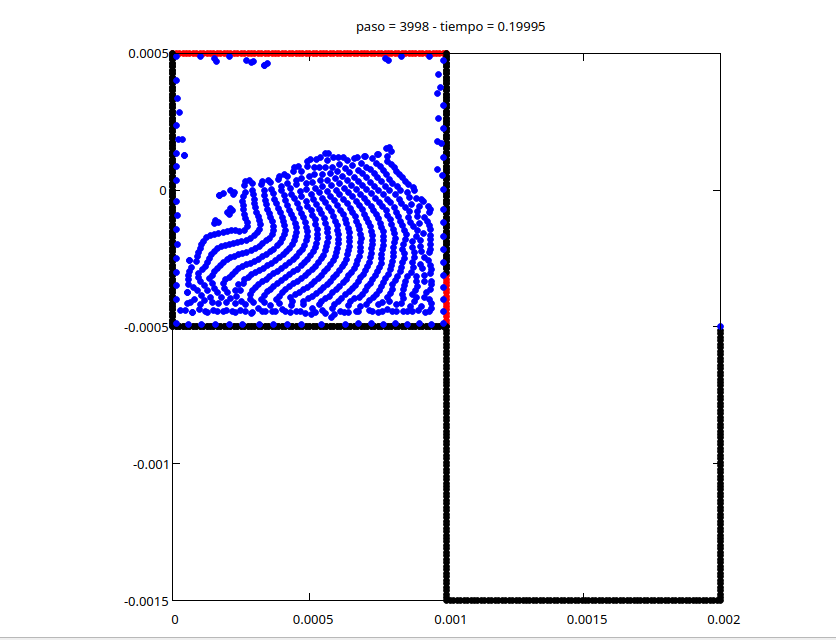

#### 2. Como prueba de que el código si es funcional volvamos a los parámetros que nos dieron el punto de estabilidad anterior.

- c = 1e-3
- B = 0.48
- dt = 5e-5

Mantenemos la misma estructura de fluido y frontera.

In [5]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="estab_base_params_cut_fluid20x40",
    input_file=est_Mac_2_cut,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 1e-3,
    dt = 5e-5,
    g = -9.8,
    steps = 4000,
    project_dir=f"{PROJECT_ROOT}/Output",
    neighbor_method="quadtree",
    project_root=PROJECT_ROOT
)

✅ params.json generado: estab_base_params_cut_fluid20x40/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estab_base_params_cut_fluid20x40/params.json')

In [6]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "estab_base_params_cut_fluid20x40",
    sim_executable=PROJECT_ROOT / "simulacionSinD2",
    timeout_seconds=10000
)


🚀 Ejecutando simulación: estab_base_params_cut_fluid20x40

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estab_base_params_cut_fluid20x40/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 1583 pos: (0.000475, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 1584 partículas desde el archivo /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/vaciado_05fluid/vaciado_est40x40_cut.txt

[particleSummary] Número total de partículas: 1584
Fluido: 800, Ancho: 0.000425, Altura: 0.0009
Frontera: 784, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/

In [7]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_PLOT = f"{PROJECT_ROOT}/Output/estab_base_params_cut_fluid20x40/Output/state_0000.txt"

generar_script_gnuplot(BASE_PLOT,
                       lim=3999,
                       retardo=0.001,
                       nombre_salida="plot_est_base_params20x40_1e-3.gp",
                       ruta_salida=f"{PROJECT_ROOT}/Output/estab_base_params_cut_fluid20x40")

✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estab_base_params_cut_fluid20x40/plot_est_base_params20x40_1e-3.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–224 (225 partículas)
  Tipo -1: líneas 225–321 (97 partículas)
  Tipo 1: líneas 322–783 (462 partículas)
  Tipo 0: líneas 784–1583 (800 partículas)


#### Hacemos uso de las funciones de reescalamiento para hacer la prueba de los parámetros

In [8]:
from pathlib import Path
from typing import Iterable, Union
from utils.reescale import rescale_simulation_geometry

def generate_scaled_simulation_cases(
    solid_geometry_path: Union[str, Path],
    fluid_geometry_path: Union[str, Path],
    scale_factors: Iterable[int],
    root_output_dir: Union[str, Path] = "scaled_cases"
) -> None:
    """
    Genera múltiples casos de simulación reescalados usando
    la función orquestadora existente.
    """

    solid_geometry_path = Path(solid_geometry_path)
    fluid_geometry_path = Path(fluid_geometry_path)
    root_output_dir = Path(root_output_dir)

    if not solid_geometry_path.exists():
        raise FileNotFoundError(solid_geometry_path)

    if not fluid_geometry_path.exists():
        raise FileNotFoundError(fluid_geometry_path)

    root_output_dir.mkdir(parents=True, exist_ok=True)

    for factor in scale_factors:
        if factor <= 0:
            raise ValueError(f"Factor inválido: {factor}")

        case_dir = root_output_dir / f"x{factor}"

        rescale_simulation_geometry(
            solid_geometry_path=solid_geometry_path,
            fluid_geometry_path=fluid_geometry_path,
            factor=factor,
            output_dir=case_dir
        )

        print(f"✔ Caso generado usando orquestador: x{factor}")


#### Escalamos la geometría desde 1e-3 hasta 100 m, lo que significa multiplicar desde 10^1 hasta 10^5

In [9]:
# Direcciones de los archivos base que reescalamos
# que correponde a la estructura anterior de JSON
# en Config/params/vaciado05fluid

BOUNDARY_ROOT = f"{PROJECT_ROOT}/Config/parameters/vaciado05fluid/vaciado_off20_boundary.json"
FLUID_ROOT = f"{PROJECT_ROOT}/Config/parameters/vaciado05fluid/vaciado_off20_fluid_cut.json"
OUTPUT_ROOT = f"{PROJECT_ROOT}/Output/scaling/scaling_20x40"

generate_scaled_simulation_cases(
    BOUNDARY_ROOT,
    FLUID_ROOT,
    [10, 1e2, 1e3, 1e4, 1e5],
    OUTPUT_ROOT
)

✔ Caso generado usando orquestador: x10
✔ Caso generado usando orquestador: x100.0
✔ Caso generado usando orquestador: x1000.0
✔ Caso generado usando orquestador: x10000.0
✔ Caso generado usando orquestador: x100000.0


In [10]:
from pathlib import Path
from utils.create_ics import create_ics_txt


def generate_ics_from_scaled_tree(
    scaling_root: Path,
    boundary_filename: str,
    fluid_filename: str,
    base_magnitude: int,
    ics_dir_name: str = "ics",
    geometry_prefix: str = "geometry"
) -> None:
    """
    Genera archivos ICS planos desde una estructura de escalamiento:

    scaling_root/
    ├── x10/
    │   ├── boundary.json
    │   └── fluid.json
    ├── x100.0/
    │   ├── ...
    └── ics/
    """

    scaling_root = Path(scaling_root)

    if not scaling_root.exists():
        raise FileNotFoundError(scaling_root)

    ics_dir = scaling_root / ics_dir_name
    ics_dir.mkdir(exist_ok=True)

    for case_dir in sorted(
        p for p in scaling_root.iterdir()
        if p.is_dir() and p.name.startswith("x")
    ):
        # Extraer factor desde el nombre de carpeta
        # x10 → 10
        # x100.0 → 100
        factor = int(float(case_dir.name[1:]))

        boundary_path = case_dir / boundary_filename
        fluid_path = case_dir / fluid_filename

        if not boundary_path.exists():
            raise FileNotFoundError(boundary_path)
        if not fluid_path.exists():
            raise FileNotFoundError(fluid_path)

        geom_number = base_magnitude * factor

        output_txt = ics_dir / f"{geometry_prefix}{geom_number}.txt"
        output_log = ics_dir / f"{geometry_prefix}{geom_number}.log"

        print(f"\n[INFO] Generando ICS desde {case_dir.name}")

        retcode = create_ics_txt(
            boundary_path=str(boundary_path.resolve()),
            fluid_path=str(fluid_path.resolve()),
            output_path=str(output_txt.resolve()),
            output_log_path=str(output_log.resolve())
        )

        if retcode != 0:
            raise RuntimeError(
                f"Fallo creando ICS para {case_dir.name}"
            )

        print(f"[✓] ICS creada: {output_txt.name}")

In [11]:
from pathlib import Path

SCALING_ROOT = Path(
    "/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca"
    "/NeighboorsFloodSPH/Output/scaling/scaling_20x40"
)

generate_ics_from_scaled_tree(
    scaling_root=SCALING_ROOT,
    boundary_filename="vaciado_off20_boundary.json",
    fluid_filename="vaciado_off20_fluid_cut.json",
    base_magnitude=1e-3
)


[INFO] Generando ICS desde x10
[INFO] Ejecutando main.py con rutas absolutas:
  main.py:      /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  boundary:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/scaling/scaling_20x40/x10/vaciado_off20_boundary.json
  fluid:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/scaling/scaling_20x40/x10/vaciado_off20_fluid_cut.json
  output txt:   /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/scaling/scaling_20x40/ics/geometry0.01.txt
  output log:   /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/scaling/scaling_20x40/ics/geometry0.01.log

[✓] Ejecución completada correctamente.

[✓] ICS creada: geometry0.01.txt

[INFO] Generando ICS desde x100.0
[INFO] Ejecutando main.py con rutas absolutas:
  main.py:      /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/Neighb

[INFO] Graficando 5 archivos ICS

[INFO] Graficando: geometry0.01.txt


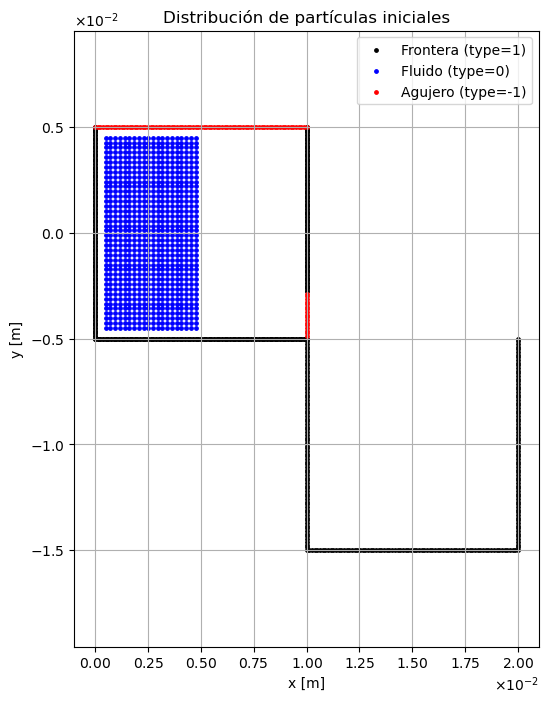

[INFO] Graficando: geometry0.1.txt


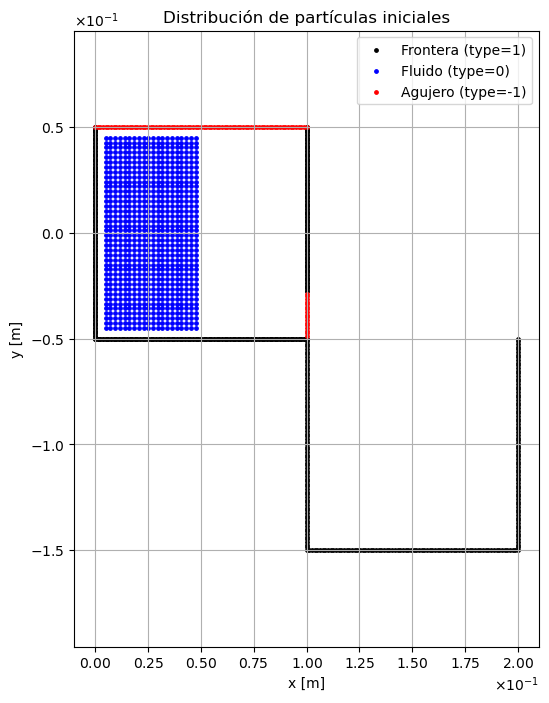

[INFO] Graficando: geometry1.0.txt


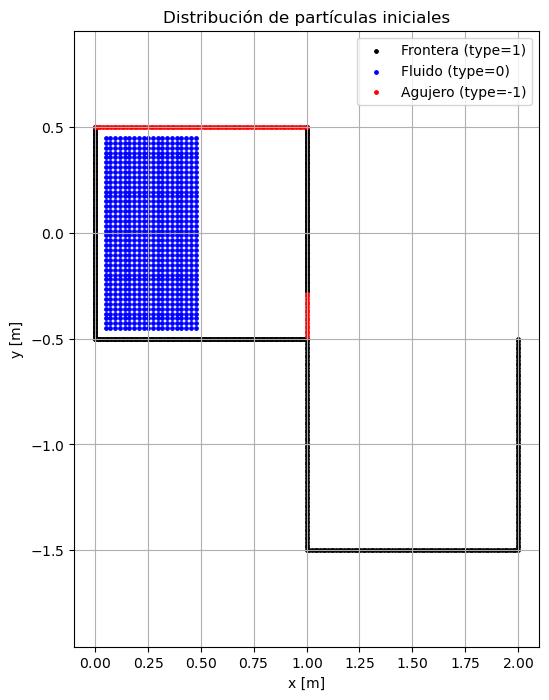

[INFO] Graficando: geometry10.0.txt


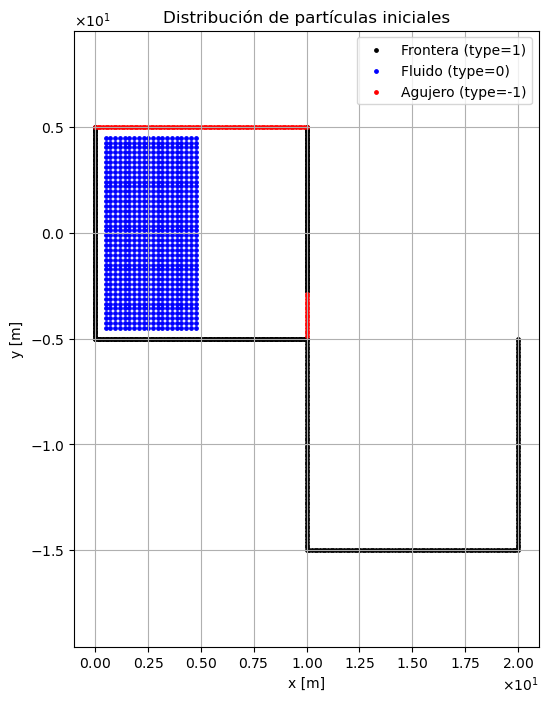

[INFO] Graficando: geometry100.0.txt


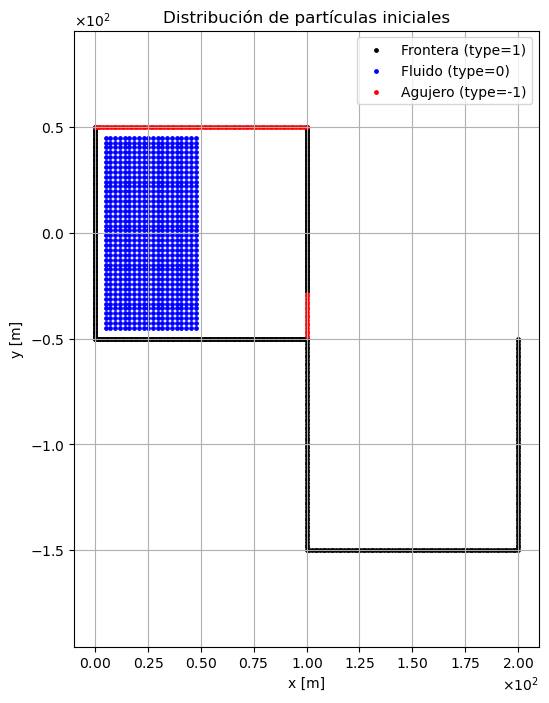

In [12]:
from pathlib import Path
from utils.plot_ics import plot_ics


def plot_all_ics_from_scaling_tree(
    scaling_root: Path,
    ics_dir_name: str = "ics",
    extension: str = ".txt"
) -> None:
    """
    Grafica todos los archivos ICS (.txt) contenidos en
    scaling_root/ics usando plot_ics.
    """

    scaling_root = Path(scaling_root)
    ics_dir = scaling_root / ics_dir_name

    if not ics_dir.exists():
        raise FileNotFoundError(f"No existe la carpeta ICS: {ics_dir}")

    txt_files = sorted(ics_dir.glob(f"*{extension}"))

    if not txt_files:
        raise RuntimeError(f"No se encontraron archivos {extension} en {ics_dir}")

    print(f"[INFO] Graficando {len(txt_files)} archivos ICS\n")

    for txt_file in txt_files:
        print(f"[INFO] Graficando: {txt_file.name}")
        plot_ics(txt_file)

# Uso
plot_all_ics_from_scaling_tree(SCALING_ROOT)
